# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Lets Understand some of the most Interesting Patterns of Funding and Startups.

**How Does the Funding Ecosystem changes with respect to Time?**

**What is the General Amount that Startups get in India?**

**Which Kind of Industries are more preferred for Startups?**

**Does Location also play a role, In determining the Growth of a Startup?**

**Who plays the main role in Indian Startups Ecosystem?**

**What are the different Types of Funding for Startups?**

# Data Reading & Cleaning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

import missingno as msno
from skimpy import skim

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [4]:
df = df.rename(columns={"Date dd/mm/yyyy": "Date","Subvertical": "Sub_vertical", "City  Location": "City"})

In [5]:
df.columns = df.columns.str.replace(" ", "_")

In [6]:
df.drop("Sr_No", axis=1, inplace=True)

In [7]:
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,Remarks
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
df.index.name = "Sıra_Nu"
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,Remarks
Sıra_Nu,,,,,,,,,
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
df.Amount_in_USD = df.Amount_in_USD.str.replace(",","")

In [10]:
df['Amount_in_USD'] = df['Amount_in_USD'].replace("undisclosed",np.nan).replace("Undisclosed",
    np.nan).replace("unknown",np.nan).str.replace("\\\\xc2\\\\xa0","").replace("N/A",np.nan).str.rstrip("+")

In [11]:
df.Amount_in_USD.unique()

array(['200000000', '8048394', '18358860', '3000000', '1800000',
       '9000000', '150000000', '6000000', '70000000', '50000000',
       '20000000', '12000000', '30000000', '5900000', '2000000',
       '231000000', '486000', '1500000', nan, '26000000', '17411265',
       '1300000', '135000000', '300000', '220000000', '15800000',
       '283000000', '1000000000', '45000000', '585000000', '4500000',
       '3300000', '5000000', '18000000', '1000000', '10000000',
       '450000000', '1600000', '140000000', '38080000', '125000000',
       '11000000', '51000000', '37000000', '500000', '110000000',
       '15000000', '6590000', '3900000000', '19000000', '2500000',
       '145000', '60000000', '16000000', '5750000', '319605',
       '4889975.54', '75000000', '2739034.68', '15109500.00', '430200',
       '15500000', '52000000', '3584000', '3400000', '868600', '11500000',
       '5600000', '17000000', '430665', '3591375', '200000', '3500000',
       '6320820', '2443495', '307000', '14342000', 

In [12]:
df.Amount_in_USD = df.Amount_in_USD.astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3044 non-null   object 
 1   Startup_Name       3044 non-null   object 
 2   Industry_Vertical  2873 non-null   object 
 3   SubVertical        2108 non-null   object 
 4   City               2864 non-null   object 
 5   Investors_Name     3020 non-null   object 
 6   InvestmentnType    3040 non-null   object 
 7   Amount_in_USD      2073 non-null   float64
 8   Remarks            419 non-null    object 
dtypes: float64(1), object(8)
memory usage: 214.2+ KB


In [14]:
df.sample(10)

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,Remarks
Sıra_Nu,,,,,,,,,
2289,01/10/2015,Indifi,Easy Business Loans platform,NaN,Gurgaon,"Accel Partners, Elevar Equity, Pramod Bhasin, ...",Seed Funding,NaN,NaN
2360,26/10/2015,Flexing It,Professionals & Project Search Marketplace,NaN,New Delhi,undisclosed private investors,Seed Funding,500000.0,NaN
2384,01/09/2015,Stylecracker,Personalized Styling platform,NaN,Mumbai,Group of HNI investors,Private Equity,1000000.0,Series A
558,23/10/2017,Park Easy,Consumer Internet,Machine learning based parking discovery,Kolkata,Rockstart Accelerator,Seed Funding,118000.0,NaN
1613,16/06/2016,Voonik,eCommerce,Online Women\\xe2\\x80\\x99s Fashion Marketplace,Bangalore,Sequoia Capital,Private Equity,20000000.0,NaN
2907,20/03/2015,Lets Corp,NaN,NaN,NaN,Wu Chay Chin,Seed Funding,3000000.0,NaN
1998,25/02/2016,Funcart,eCommerce,Party Supplies Etailer,New Delhi,Undisclosed HNIs,Seed Funding,70000.0,NaN
2218,06/11/2015,Soothe Healthcare,affordable Personal Healthcare Products,NaN,Noida,Saina Nehwal,Seed Funding,NaN,2nd seed funding
411,22/01/2018,OptaCredit,Finance,Alternative Lending,Chennai,DMI Finance,Private Equity,4000000.0,NaN


In [15]:
df['Tarih'] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors='coerce')

np.argwhere(df['Tarih'].isna())

array([[ 192],
       [2571],
       [2606],
       [2775],
       [2776],
       [2831],
       [3011],
       [3029]], dtype=int64)

In [16]:
df.Date.loc[[192, 2571,2606,2775,2776,2831,3011,3029]] = ["05/07/2018", "01/07/2015","10/07/2015","12/05/2015","12/05/2015",
                                                          "13/04/2015","15/01/2015","22/01/2015"]

In [17]:
df.Date.loc[[192, 2571,2606,2775,2776,2831,3011,3029]]

Sıra_Nu
192     05/07/2018
2571    01/07/2015
2606    10/07/2015
2775    12/05/2015
2776    12/05/2015
2831    13/04/2015
3011    15/01/2015
3029    22/01/2015
Name: Date, dtype: object

In [18]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")

In [19]:
df.drop("Tarih", axis=1, inplace=True)

In [20]:
df.drop("Remarks", axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3044 non-null   datetime64[ns]
 1   Startup_Name       3044 non-null   object        
 2   Industry_Vertical  2873 non-null   object        
 3   SubVertical        2108 non-null   object        
 4   City               2864 non-null   object        
 5   Investors_Name     3020 non-null   object        
 6   InvestmentnType    3040 non-null   object        
 7   Amount_in_USD      2073 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 190.4+ KB


In [22]:
df.isnull().sum()

Date                   0
Startup_Name           0
Industry_Vertical    171
SubVertical          936
City                 180
Investors_Name        24
InvestmentnType        4
Amount_in_USD        971
dtype: int64

In [23]:
df.iloc[2097]

Date                                           2016-01-29 00:00:00
Startup_Name                                             BitGiving
Industry_Vertical                                Consumer Internet
SubVertical                                 Crowd Funding Platform
City                                                     New Delhi
Investors_Name       Harminder Sahni, Krishna Mehra, Sanjay Bakshi
InvestmentnType                                       Seed Funding
Amount_in_USD                                                  NaN
Name: 2097, dtype: object

In [24]:
df.sample(10)

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD
Sıra_Nu,,,,,,,,
764,2017-06-21,Fabulyst,Technology,Artificial Intelligence based platform,Hyderabad,iBhubs,Seed Funding,215000.0
1470,2016-08-24,Advenio,Technology,Clinical Imaging Solution Provider,Chandigarh,Kalaari Capital,Seed Funding,100000.0
625,2017-09-26,Multibhashi,Consumer Internet,Language learning Mobile App,Bangalore,"Aniruddha Malpani, Startup Oasis",Seed Funding,NaN
583,2017-09-06,Power2SME,eCommerce,Buying Club for Small Businesses,Gurgaon,"International Finance Corporation (IFC), Inven...",Private Equity,26000000.0
463,2017-12-20,Your Quote,Technology,Vernacular and Video Content Platform,Bengaluru,"Axilor Ventures, E-City VEntures Atul Goel",Private Equity,1000000.0
1693,2016-05-11,Zenify,Consumer Internet,Home rental Discovery & Booking Portal,Bangalore,Undisclosed Investors,Private Equity,900000.0
1140,2016-12-12,Rupaiya Exchange,Consumer Internet,P2P Lending platform,New Delhi,Undisclosed Investors,Seed Funding,200000.0
2502,2015-08-10,Actionable Analytics,Machine Learning Platform,NaN,New Delhi/ Houston,"B M Gupta, Vinod Singhal",Seed Funding,NaN
84,2019-06-10,Bolo App,Digital Media,Video Platform,Bengaluru,Nexus Venture Partners,Seed Funding,430200.0


In [25]:
df.dropna(axis=0, thresh=7, inplace=True, ignore_index=True)

In [26]:
df.groupby("InvestmentnType")["Amount_in_USD"].count()

InvestmentnType
Angel                             1
Angel / Seed Funding              4
Angel Funding                     0
Angel Round                       1
Bridge Round                      0
Corporate Round                   1
Debt                              1
Debt Funding                     24
Debt and Preference capital       1
Debt-Funding                      1
Equity                            2
Equity Based Funding              1
Funding Round                     1
Inhouse Funding                   1
Maiden Round                      1
Mezzanine                         1
Pre Series A                      0
Pre-Series A                      4
Pre-series A                      1
Private                           1
Private Equity                 1002
Private Equity Round              4
Private Funding                   1
PrivateEquity                     1
Seed                              4
Seed / Angel Funding             38
Seed / Angle Funding              2
Seed Funding

In [27]:
df["InvestmentnType"] = df["InvestmentnType"].str.split(" ").str[0]

In [28]:
df["InvestmentnType"] = df["InvestmentnType"].str.split("/").str[0]

In [29]:
df["InvestmentnType"].replace({"Pre": "Pre-Series","Pre-series":"Pre-Series","pre-Series":"Pre-Series",
                              "pre-series":"Pre-Series","Debt-Funding":"Debt", "PrivateEquity":"Private"}, inplace =True)

In [30]:
df[df["InvestmentnType"] == "Bridge"]

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD
91,2019-05-05,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge,NaN


In [31]:
df.drop([91],inplace=True)

In [32]:
df.groupby("InvestmentnType")["Amount_in_USD"].mean()

InvestmentnType
Angel         2.998675e+05
Corporate     3.808000e+07
Debt          6.540118e+06
Equity        4.400000e+07
Funding       1.000000e+09
Inhouse       2.443495e+06
Maiden        4.500000e+06
Mezzanine     1.000000e+06
Pre-Series    5.546500e+06
Private       2.579343e+07
Seed          1.284952e+06
Series        1.057883e+08
Single        1.400000e+08
Structured    8.600000e+06
Term          6.240000e+06
Venture       6.956200e+06
Name: Amount_in_USD, dtype: float64

In [33]:
df.Amount_in_USD.fillna(df.groupby("InvestmentnType")["Amount_in_USD"].transform(lambda x : x.mean()),inplace=True)

In [34]:
np.where(df.City.isna())

(array([1594, 1899], dtype=int64),)

In [35]:
df.City.value_counts()

City
Bangalore           637
Mumbai              515
New Delhi           365
Gurgaon             263
Bengaluru           140
                   ... 
Palo Alto             1
Hubli                 1
Kerala                1
Kozhikode             1
\\xc2\\xa0Mumbai      1
Name: count, Length: 106, dtype: int64

In [36]:
df.iloc[[1593,1594,1595,1898,1899,1900]]

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD
1594,2016-06-13,Bombay Shirt Company,eCommerce,Online custom Shirt retailer,Mumbai,undisclosed investor,Private,1.000000e+06
1595,2016-06-13,Matrubharti,Consumer Internet,e-Book Publisher,NaN,Viridian Capital,Seed,3.000000e+04
1596,2016-06-14,EdTechReview,Consumer Internet,Education based online portal,New Delhi,EVC Ventures,Seed,1.284952e+06
1899,2016-02-02,Strike,Consumer Internet,Mobile Email productivity tool,Bangalore,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04
1900,2016-02-02,MaaxMarket,Consumer Internet,Marketing Automation platform,NaN,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04
1901,2016-02-02,Gamooz,Technology,Augmented Reality Solutions,Gurgaon,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04


In [37]:
df.City.fillna(method="ffill",inplace=True)

In [38]:
np.where(df.Investors_Name.isna())

(array([ 13,  46, 153, 167, 177, 179, 187, 207, 258, 281, 288, 304, 342,
        393, 455], dtype=int64),)

In [39]:
df.iloc[[ 13,  46, 153, 167, 177, 179, 187, 207, 258, 281, 288, 304, 342,
        393, 455]]

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD
13,2019-12-16,InCred,Finance,Non-Banking Financial Company,Mumbai,NaN,Debt,5900000.0
46,2019-08-01,MyPetrolPump,Retail,Fuel Delivery,Bengaluru,NaN,Seed,1600000.0
154,2018-09-04,3HCare,Healthcare,Healthcare Service Provider,Delhi,NaN,Seed,1000000.0
168,2018-08-07,My OmNamo,Consumer Internet,Holy Platform Offering Customised Puja Package...,Mumbai,NaN,Seed,1000000.0
178,2018-08-16,Enakshi,Consumer Internet,AI Based Solutions Platform,Ahemadabad,NaN,Seed,114811.0
180,2018-08-20,Finzy,Finance,Online Loan Matchmaking Platform,Bengaluru,NaN,Seed,1000000.0
188,2018-08-30,True North,Finance,Private Equity Firm,Mumbai,NaN,Private,600000000.0
208,2018-07-20,HousingMan,Consumer Internet,Property Discovery Platform,Bengaluru,NaN,Seed,1500000.0
259,2018-05-07,PaisaDukan,Consumer Internet,P2P Lending Platform,Mumbai,NaN,Seed,225000.0
282,2018-04-02,Finzy,Consumer Internet,Online Loan Matchmaking Platform,Bengaluru,NaN,Seed,1300000.0


In [40]:
df.Investors_Name.fillna("Unknown", inplace = True)

In [41]:
df['SubVertical'].fillna("Not Specified", inplace=True)

In [42]:
df['InvestmentnType'].mode()[0]

'Seed'

In [43]:
df['InvestmentnType'].fillna(df['InvestmentnType'].mode()[0], inplace=True)

In [44]:
df["year"] = df.Date.dt.strftime("%Y")
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private,200000000.0,2020
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series,8048394.0,2020
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series,18358860.0,2020
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series,3000000.0,2020
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed,1800000.0,2020


In [45]:
df["month"] = df.Date.dt.strftime("%m")
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private,200000000.0,2020,01
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series,8048394.0,2020,01
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series,18358860.0,2020,01
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series,3000000.0,2020,01
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed,1800000.0,2020,01


In [46]:
df["Quarter"] = df.Date.dt.quarter
df.sample()

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month,Quarter
1200,2016-11-09,IIM Jobs,Consumer Internet,Online Job Portal,New Delhi,India Quotient,Private,2000000.0,2016,11,4


In [47]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2615   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 11     │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA ┃ NA % ┃ mean     ┃ sd        ┃ p0    ┃ p25    ┃ p50     ┃ p75      ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Amount_in_U │  0 │    0 │ 16000000 │ 110000000 │ 18000 │ 740000 │ 1300000 │ 10000000 │ 3900000000 │   ▇    │  │
│ │ SD          │    │      │          │           │       │        │         │          │            │        │  │
│ │ Quarter     │  0 │    0 │      2.5 │       1.1 │     1 │      2 │       2 │        3 │          4 │ ▇ ▇ ▇▇ │  │
│ └─────────────┴────┴──────┴──────────┴───────────┴───────┴────────┴─────────┴──────────┴────────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                   │      0 │         0 │     2015-04-03      │     2020-01-13      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Startup_Name                      │      0 │         0 │                       1.3 │                  3354 │  │
│ │ Industry_Vertical                 │      0 │         0 │                         2 │                  5107 │  │
│ │ SubVertical                       │      0 │         0 │                       3.6 │                  9324 │  │
│ │ City                              │      0 │         0 │                       1.2 │                  3045 │  │
│ │ Investors_Name                    │      0 │         0 │                       4.7 │                 12179 │  │
│ │ InvestmentnType                   │      0 │         0 │                         1 │                  2615 │  │
│ │ year                              │      0 │        

In [48]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2615,2016-12-05 03:58:26.386233088,2015-04-03 00:00:00,2016-02-10 00:00:00,2016-10-07 00:00:00,2017-08-11 00:00:00,2020-01-13 00:00:00,NaN
Amount_in_USD,2615.0,16414271.349355,18000.0,742500.0,1284951.664141,10000000.0,3900000000.0,108023162.121249
Quarter,2615.0,2.487572,1.0,2.0,2.0,3.0,4.0,1.083603


In [49]:
df.Investors_Name.nunique()

2113

In [50]:
df.Startup_Name.nunique()

2157

In [51]:
df.Industry_Vertical.nunique()

590

In [52]:
df.InvestmentnType.nunique()

16

In [53]:
df.City.nunique()

106

In [54]:
df.Amount_in_USD.sum()

42923319578.56358

# How Does the Funding Ecosystem changes with respect to Time?

In [55]:
funding_by_year = df.groupby('year').size()
funding_by_month = df.groupby("month").size()
funding_by_quarter = df.groupby('Quarter').size()

In [56]:
funding_by_year

year
2015    516
2016    989
2017    685
2018    308
2019    110
2020      7
dtype: int64

In [57]:
funding_by_year.mean()

435.8333333333333

In [58]:
funding_by_month

month
01    223
02    193
03    189
04    248
05    219
06    266
07    222
08    239
09    213
10    202
11    215
12    186
dtype: int64

In [59]:
funding_by_month.mean()

217.91666666666666

In [60]:
funding_by_quarter

Quarter
1    605
2    733
3    674
4    603
dtype: int64

In [61]:
funding_by_quarter.mean()

653.75

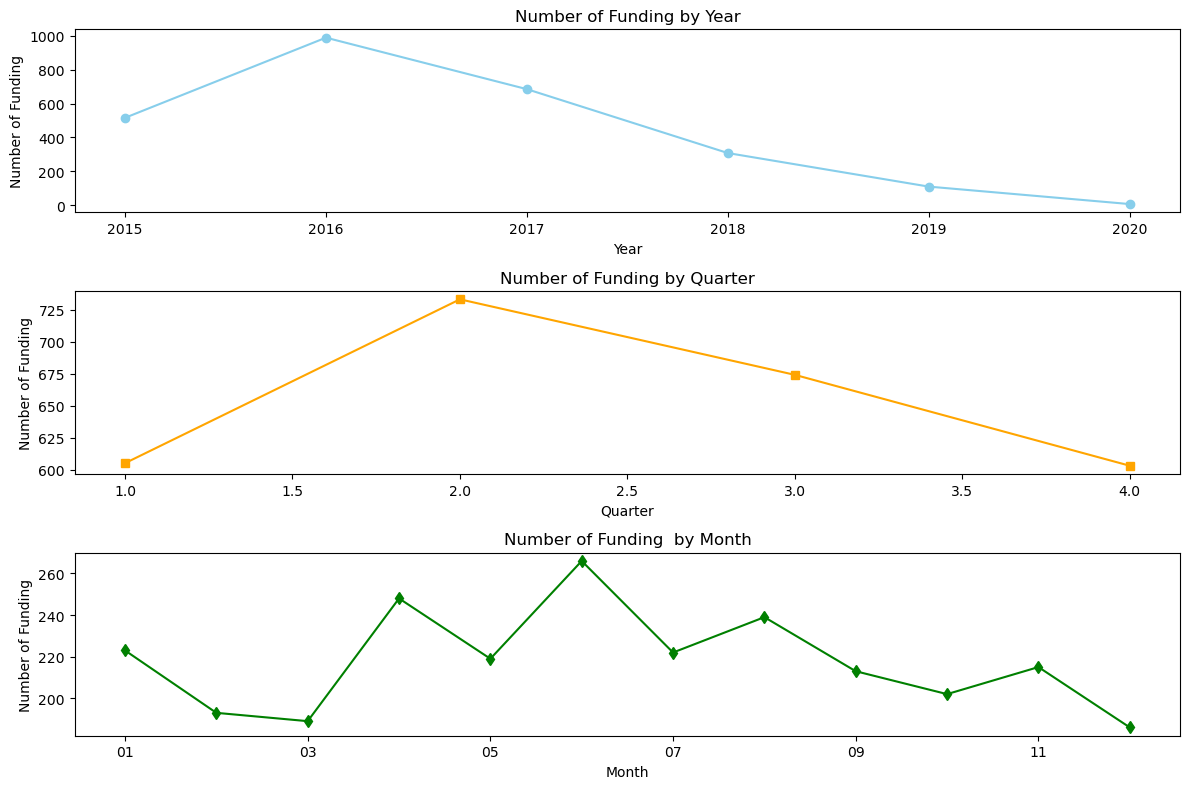

In [62]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
funding_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Funding by Year')
plt.xlabel('Year')
plt.ylabel('Number of Funding')

plt.subplot(3, 1, 2)
funding_by_quarter.plot(kind='line', marker='s', color='orange') 
plt.title('Number of Funding by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Funding')

plt.subplot(3, 1, 3)
funding_by_month.plot(kind='line', marker='d', color='green') 
plt.title('Number of Funding  by Month')
plt.xlabel('Month')
plt.ylabel('Number of Funding')

plt.tight_layout()
plt.show()

# What is the General Amount that Startups get in India?

In [63]:
df.Amount_in_USD.sum()

42923319578.56358

In [64]:
df['Amount_in_USD'].max()

3900000000.0

In [65]:
df['Amount_in_USD'].min()

18000.0

In [66]:
df['Amount_in_USD'].mean()

16414271.3493551

In [67]:
sorted_df = df.sort_values(by='Amount_in_USD', ascending=False)
sorted_df

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month,Quarter
60,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series,3.900000e+09,2019,08,3
649,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private,2.500000e+09,2017,08,3
827,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private,1.400000e+09,2017,05,2
962,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private,1.400000e+09,2017,03,1
31,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding,1.000000e+09,2019,11,4
...,...,...,...,...,...,...,...,...,...,...,...
1899,2016-02-02,Strike,Consumer Internet,Mobile Email productivity tool,Bangalore,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04,2016,02,1
1105,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,New Delhi,The Ten Minute Million,Seed,2.250000e+04,2017,01,1
1901,2016-02-02,Gamooz,Technology,Augmented Reality Solutions,Gurgaon,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04,2016,02,1
2413,2015-07-08,33Coupons,Coupon Aggregator Platform,Not Specified,Kanpur,Not Disclosed,Seed,2.000000e+04,2015,07,3


In [83]:
df.loc[60]

Date                 2019-08-27 00:00:00
Startup_Name            Rapido Bike Taxi
Industry_Vertical         Transportation
SubVertical                    Bike Taxi
City                           Bengaluru
Investors_Name        Westbridge Capital
InvestmentnType                   Series
Amount_in_USD               3900000000.0
year                                2019
month                                 08
Quarter                                3
Name: 60, dtype: object

In [78]:
sorted_df = df.sort_values(by='Amount_in_USD', ascending=False)
sorted_df

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month,Quarter
60,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series,3.900000e+09,2019,08,3
649,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private,2.500000e+09,2017,08,3
827,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private,1.400000e+09,2017,05,2
962,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private,1.400000e+09,2017,03,1
31,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding,1.000000e+09,2019,11,4
...,...,...,...,...,...,...,...,...,...,...,...
1899,2016-02-02,Strike,Consumer Internet,Mobile Email productivity tool,Bangalore,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04,2016,02,1
1105,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,New Delhi,The Ten Minute Million,Seed,2.250000e+04,2017,01,1
1901,2016-02-02,Gamooz,Technology,Augmented Reality Solutions,Gurgaon,Multiple investors through Ten Minute Million ...,Seed,2.250000e+04,2016,02,1
2413,2015-07-08,33Coupons,Coupon Aggregator Platform,Not Specified,Kanpur,Not Disclosed,Seed,2.000000e+04,2015,07,3


In [82]:
df.loc[1107]

Date                       2017-01-30 00:00:00
Startup_Name                           Maptags
Industry_Vertical            Consumer Internet
SubVertical          Smart Online address tags
City                                 Bangalore
Investors_Name          The Ten Minute Million
InvestmentnType                           Seed
Amount_in_USD                          18000.0
year                                      2017
month                                       01
Quarter                                      1
Name: 1107, dtype: object

In [96]:
top_11 = sorted_df[:11]
top_11

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month,Quarter
60,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series,3.900000e+09,2019,08,3
649,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private,2.500000e+09,2017,08,3
827,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private,1.400000e+09,2017,05,2
962,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private,1.400000e+09,2017,03,1
31,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding,1.000000e+09,2019,11,4
2452,2015-07-28,Flipkart,Online Marketplace,Not Specified,Bangalore,Steadview Capital and existing investors,Private,7.000000e+08,2015,07,3
2326,2015-09-29,Paytm,E-Commerce & M-Commerce platform,Not Specified,New Delhi,"Alibaba Group, Ant Financial",Private,6.800000e+08,2015,09,3
188,2018-08-30,True North,Finance,Private Equity Firm,Mumbai,Unknown,Private,6.000000e+08,2018,08,3
33,2019-10-02,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series,5.850000e+08,2019,10,4
2333,2015-08-01,Snapdeal,Ecommerce Marketplace,Not Specified,New Delhi,"Alibaba, Foxconn, Softbank",Private,5.000000e+08,2015,08,3


In [95]:
top_11.groupby("Startup_Name")["Amount_in_USD"].count()

Startup_Name
Flipkart            3
Ola                 1
Paytm               3
Rapido Bike Taxi    1
Snapdeal            1
True North          1
Udaan               1
Name: Amount_in_USD, dtype: int64

In [94]:
top_11["Startup_Name"].replace({"Flipkart.com": "Flipkart"}, inplace =True)

In [97]:
top_5 = sorted_df[:9]
top_5

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month,Quarter
60,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series,3.900000e+09,2019,08,3
649,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private,2.500000e+09,2017,08,3
827,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private,1.400000e+09,2017,05,2
962,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private,1.400000e+09,2017,03,1
31,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding,1.000000e+09,2019,11,4
2452,2015-07-28,Flipkart,Online Marketplace,Not Specified,Bangalore,Steadview Capital and existing investors,Private,7.000000e+08,2015,07,3
2326,2015-09-29,Paytm,E-Commerce & M-Commerce platform,Not Specified,New Delhi,"Alibaba Group, Ant Financial",Private,6.800000e+08,2015,09,3
188,2018-08-30,True North,Finance,Private Equity Firm,Mumbai,Unknown,Private,6.000000e+08,2018,08,3
33,2019-10-02,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series,5.850000e+08,2019,10,4


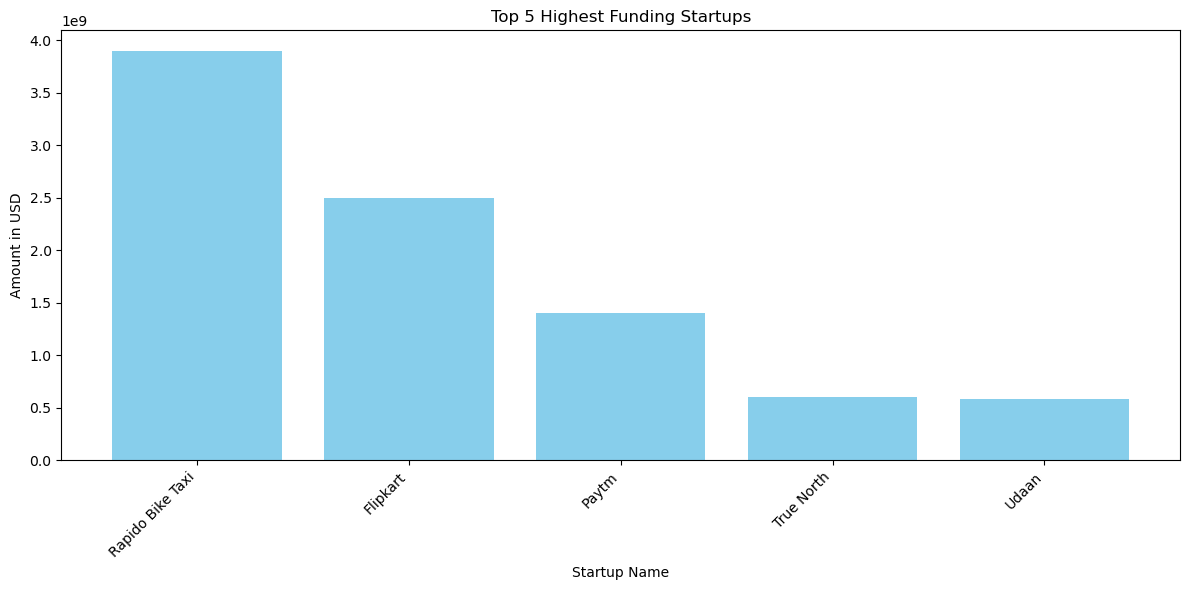

In [98]:
plt.figure(figsize=(12,6))


plt.bar(top_5['Startup_Name'], top_5['Amount_in_USD'], color='skyblue')

plt.xlabel('Startup Name')
plt.ylabel('Amount in USD')
plt.title('Top 5 Highest Funding Startups')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
round(df["Amount_in_USD"].mean(),2)

16414271.35

# Which Kind of Industries are more preferred for Startups?

In [81]:
kind_ind = df["Industry_Vertical"].value_counts()[:10]
kind_ind

Industry_Vertical
Consumer Internet    935
Technology           477
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       22
Name: count, dtype: int64

In [82]:
df["Industry_Vertical"].replace({"eCommerce": "e-Commerce","ECommerce" :"e-Commerce", 
                                      "E-Commerce": "e-Commerce","E-commerce":"e-Commerce"},inplace=True)

In [83]:
kind_ind = df["Industry_Vertical"].value_counts()[:10]
kind_ind

Industry_Vertical
Consumer Internet    935
Technology           477
e-Commerce           287
Healthcare            70
Finance               62
Logistics             32
Education             24
Food & Beverage       22
Ed-Tech               13
FinTech                9
Name: count, dtype: int64

In [84]:
top_10_total= kind_ind.sum()
top_10_total

1931

In [85]:
top_3_total= (kind_ind[:4].sum())
top_3_total

1769

In [87]:
top_3_top_10_rate = ((top_3_total / top_10_total) *100).round(0)
top_3_top_10_rate

92.0

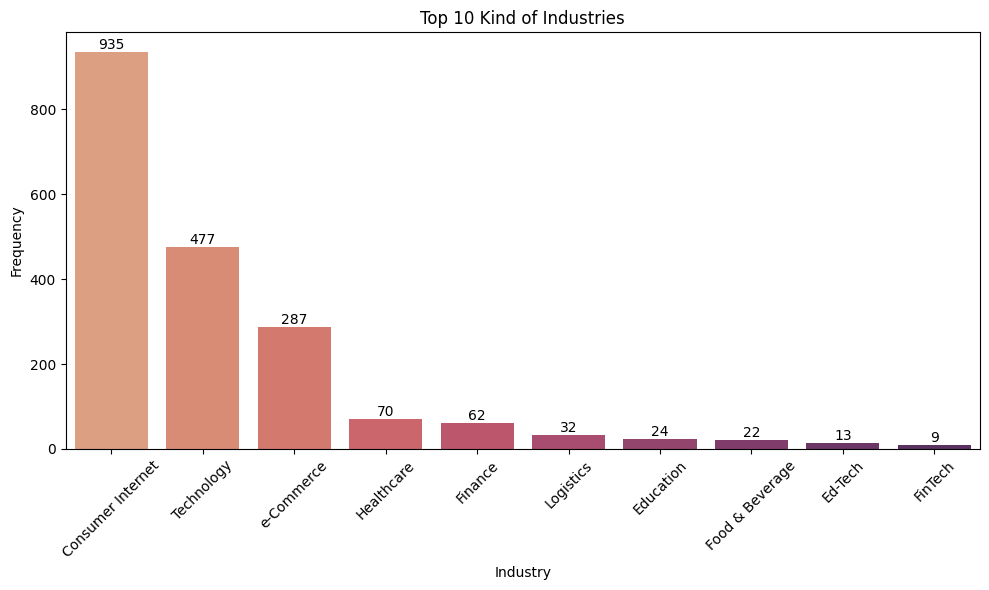

In [88]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x=kind_ind.index, y=kind_ind.values, palette='flare')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.title('Top 10 Kind of Industries')

plt.xticks(rotation=45)
plt.tight_layout();

# Does Location also play a role, In determining the Growth of a Startup?

In [94]:
top_cities = df.groupby("City").size().sort_values(ascending=False)[:10]
top_cities

City
Bengaluru    778
Mumbai       516
New Delhi    397
Gurgaon      313
Pune         100
Hyderabad     93
Chennai       88
Noida         83
Ahmedabad     36
Jaipur        29
dtype: int64

In [95]:
df["City"].replace({"Bangalore": "Bengaluru","Gurugram" :"Gurgaon", 
                                      "Delhi": "New Delhi","Kolkatta":"Kolkata"},inplace=True)

In [96]:
top_cities = df.groupby("City").size().sort_values(ascending=False)[:10]
top_cities

City
Bengaluru    778
Mumbai       516
New Delhi    397
Gurgaon      313
Pune         100
Hyderabad     93
Chennai       88
Noida         83
Ahmedabad     36
Jaipur        29
dtype: int64

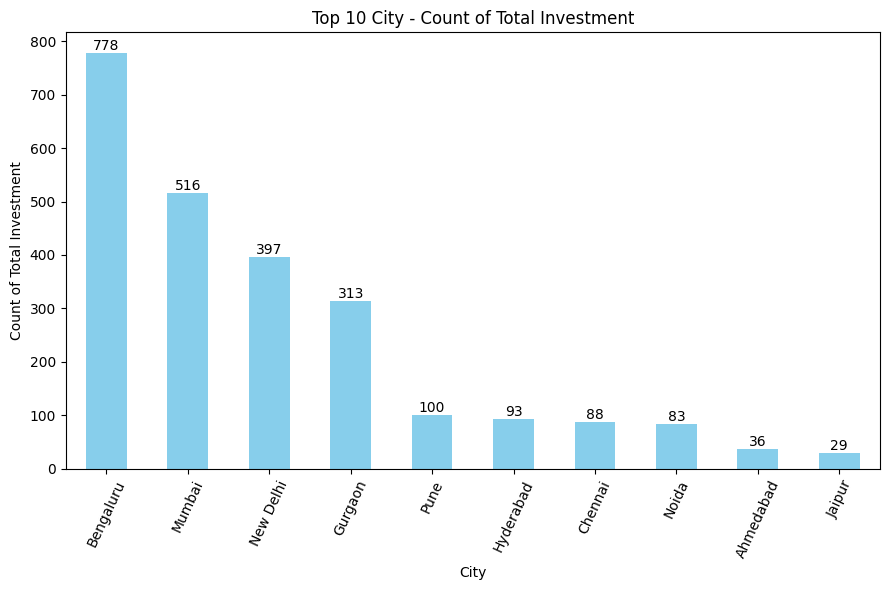

In [101]:
plt.figure(figsize=(9, 6))

ax = top_cities.plot(kind='bar', color='skyblue')

plt.title(f'Top {10} City - Count of Total Investment')
plt.xlabel('City')
plt.ylabel('Count of Total Investment')
plt.xticks(rotation=65)

for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout();

plt.show()

# Who plays the main role in Indian Startups Ecosystem?

In [103]:
top_who = df.groupby("Investors_Name").size().sort_values(ascending=False)[:10]
top_who

Investors_Name
Undisclosed Investors    35
Undisclosed investors    27
Indian Angel Network     20
Ratan Tata               16
Unknown                  15
Sequoia Capital          13
Undisclosed Investor     12
Kalaari Capital          12
undisclosed investors    11
Venture Catalysts        11
dtype: int64

In [108]:
df["Investors_Name"].replace({"undisclosed investors": "Undisclosed Investors","Undisclosed investors":"Undisclosed Investors",
                               "Unknown": "Undisclosed Investors","Undisclosed": "Undisclosed Investors","Undisclosed investor": "Undisclosed Investors"}, inplace =True)

In [110]:
top_who = df.groupby("Investors_Name").size().sort_values(ascending=False)[:10]
top_who

Investors_Name
Undisclosed Investors    118
Indian Angel Network      20
Ratan Tata                16
Sequoia Capital           13
Kalaari Capital           12
Venture Catalysts         11
Brand Capital             11
Accel Partners            10
RoundGlass Partners        9
Info Edge (India) Ltd      9
dtype: int64

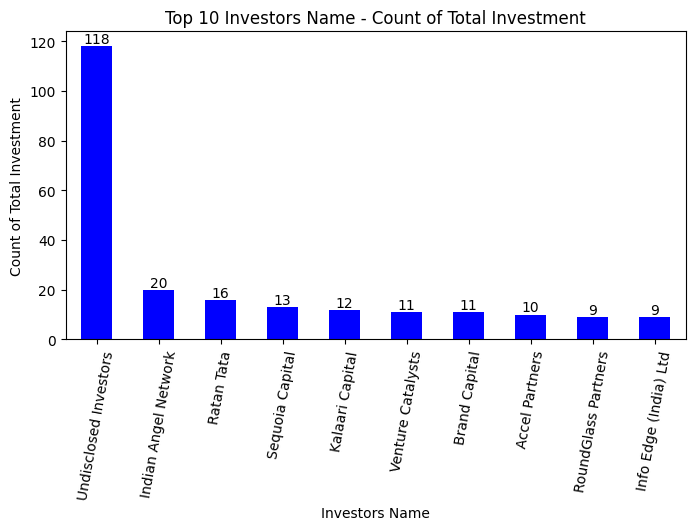

In [111]:
plt.figure(figsize=(8, 4))

ax = top_who.plot(kind='bar', color='blue')

for container in ax.containers:
    ax.bar_label(container)

plt.title(f'Top {10} Investors Name - Count of Total Investment')
plt.xlabel('Investors Name')
plt.ylabel('Count of Total Investment')
plt.xticks(rotation=80);

In [112]:
df.head()

,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,InvestmentnType,Amount_in_USD,year,month,Quarter
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private,200000000.0,2020,01,1
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series,8048394.0,2020,01,1
2,2020-01-09,Mamaearth,e-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series,18358860.0,2020,01,1
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series,3000000.0,2020,01,1
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed,1800000.0,2020,01,1


# What are the different Types of Funding for Startups?

In [116]:
fund_type = df.groupby("InvestmentnType").size().sort_values(ascending=False)[:3]
fund_type

InvestmentnType
Seed       1263
Private    1210
Series       78
dtype: int64

In [169]:
a = fund_type.index

In [170]:
b = fund_type.values

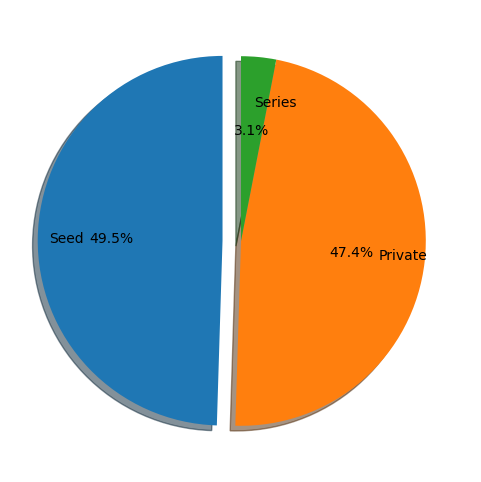

In [167]:
plt.figure(figsize=(6, 6))

myexplode = [0.1, 0, 0]

plt.pie(b, labels=a, autopct='%1.1f%%', labeldistance=0.75, startangle=90, 
        shadow=True, explode=myexplode);

# Conclusions

**1.** <span style="color:blue">Yaklaşık 5 yıllık süreçte toplam 2.113 yatırımcı 2.157 yatırıma 590 sektörde Hindistanın 106 şehrinde 16 farklı yatırım yöntemi kullanarak toplam 43 milyar Usd yatırım yapmıştır.</span>

**2.** <span style="color:blue">Beş yıllık süreçte yıllık ortalama yatırım adedi 435 olup en fazla yatırım adedi 989 adet ile 2016 da en az yatırım adedi 110 adet ile 2019 yılındadır.</span>

**3.** <span style="color:blue">Beş yıllık süreçte aylık ortalama yatırım adedi 218 olup en fazla yatırım adedi toplam 266 adet ile Haziran aylarında en az yatırım adedi toplam 186 adet ile Aralık aylarında gerçekleşmiştir.</span>

**4.** <span style="color:blue">Beş yıllık süreçte çeyrek dönemlere ait ortalama yatırım adedi 653 olup en fazla yatırım adedi toplam 733 adet ile 1. çeyreklerde en az yatırım adedi toplam 603 adet ile 4. çeyreklerde gerçekleşmiştir.</span>

**5.** <span style="color:blue">Beş yıllık süreçte ortalama yatırım tutarı 16.5 milyon Usd olup en fazla yatırım tutarı 3.9 milyar Usd ile Westbridge Capital tarafından Ulaşım sektöründe Bengaluru şehrindeki Rapido Bike Taxi şirketine en az yatırım tutarı 18 bin Usd ile Chandigarh Angels Network(CAN tarafından) Tüketici İnterneti sektöründe Mumbai şehrindeki YOLO Health şirketine yapılmıştır.</span>

**6.** <span style="color:blue">Top 10 Start up firmaları sırasıyla en fazla 935 adet ile Tüketici interneti, 477 adet ile Teknoloji ve 287 adet ile e-ticaret alanlarında girişimde bulunmuşlardır. Bu girişimler ilk 10 daki girişimler sayılarının 92% sini kapsamaktadır.</span>
    
**7.** <span style="color:blue">Adet olarak en fazla yatırım yapılan şehirler sırasıyla 778 adet ile Bengaluru, 516 adet ile Mumbai ve 397 adet ile New Delhi şehirlerindedir.</span>
    
**8.** <span style="color:blue">Yatırımıcıların büyük bir kısmı ismini beyan etmemiştir. Diğer yatırımcılar arasında adet olarak en fazla yatırım yapan Indian Angel Network firmasıdır. Bununla birlikte diğer yatırımcılar arasında belirgin bir fark görülmemektedir. </span>
    
**9.** <span style="color:blue">Yatırımcıların kulllandığı toplam yatırım türü 16 adet olmakla birlikte yatırımcıların en çok tercih ettiği iki tür sırasıyla Seed ve Private tır.</span>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Startups Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |